In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from diagnostics import lm_plots

%matplotlib inline

line_kw = {'color':'red', 'alpha':0.5}
scatter_kw = {'marker':'o', 'edgecolors':'black', 'color':'white'}

## Exercise 15

This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [2]:
data = pd.read_csv('../datasets/boston.csv')

__(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.__

In [3]:
for column in data.drop('crim', axis=1).columns:
    model = sm.OLS(data.crim, sm.add_constant(data[column])).fit()
    non_significant = model.pvalues[column] >= 0.05
    print('predictor "{}" is {}significant {}'.format(column, '*not* ' if non_significant else '', model.pvalues[column]))

predictor "zn" is significant 5.506472107679021e-06
predictor "indus" is significant 1.4503489330271351e-21
predictor "chas" is *not* significant 0.20943450153520077
predictor "nox" is significant 3.751739260356978e-23
predictor "rm" is significant 6.346702984687886e-07
predictor "age" is significant 2.854869350244178e-16
predictor "dis" is significant 8.519948766926021e-19
predictor "rad" is significant 2.6938443981858274e-56
predictor "tax" is significant 2.357126835257048e-47
predictor "ptratio" is significant 2.942922447359666e-11
predictor "black" is significant 2.4872739737737525e-19
predictor "lstat" is significant 2.6542772314731968e-27
predictor "medv" is significant 1.1739870821943443e-19


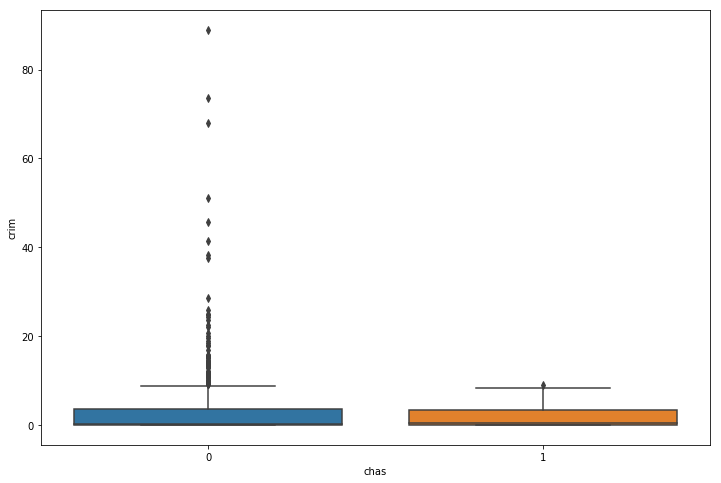

In [4]:
_, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(x='chas', y='crim', data=data, ax=ax)
# ax.set_yscale('log');

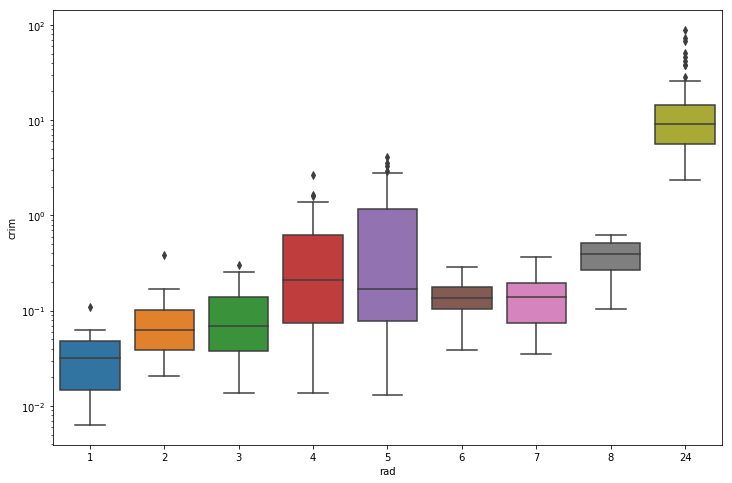

In [5]:
_, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(x='rad', y='crim', data=data, ax=ax)
ax.set_yscale('log');

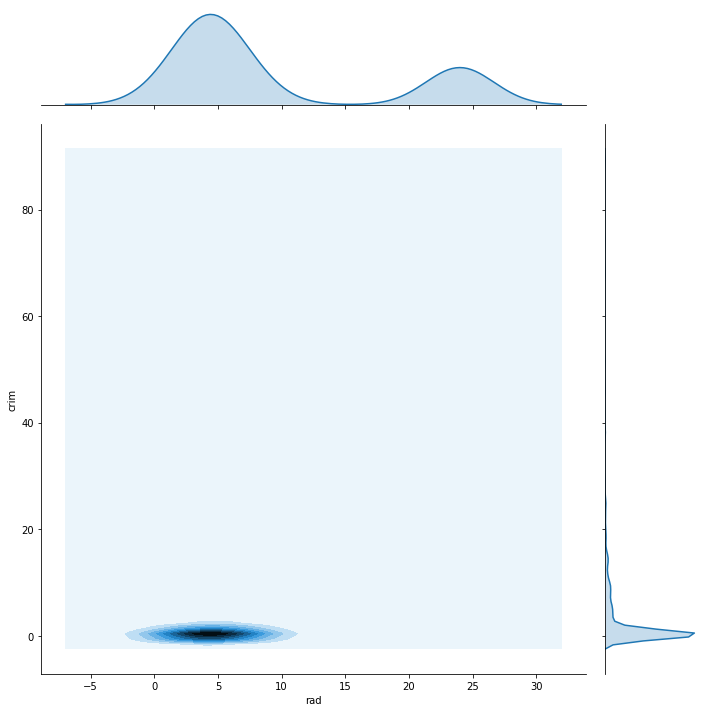

In [36]:
sns.jointplot(x='rad', y='crim', data=data, kind='kde', height=10);

__(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?__

In [46]:
X = data.drop('crim', axis=1)
y = data.crim

m_model = sm.OLS(y, sm.add_constant(X)).fit()
m_model.pvalues[m_model.pvalues < 0.05]

const    1.894909e-02
zn       1.702489e-02
dis      5.022039e-04
rad      6.460451e-11
black    4.070233e-02
medv     1.086810e-03
dtype: float64

__(c) How do your results from (a) compare to your results from (b)?__

__Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regres- sion model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.__

On the multiple regression model, there are less significant coefficients. This is probably due to multicolinearity.

In [64]:
xs = {}
for column in data.drop('crim', axis=1).columns:
    model = sm.OLS(data.crim, sm.add_constant(data[column])).fit()
    xs[column] = [model.params[column]]
    
for c in m_model.params.index:
    if c == 'const':
        continue
    xs[c] = xs[c] + [m_model.params[c]]

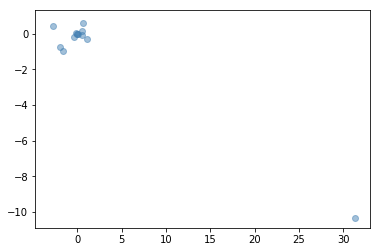

In [65]:
for val in xs.values():
    x, y = val
    plt.scatter(x, y, color='steelblue', alpha=0.5)

In [68]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


__(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form__

Left as an exercise to the reader :)